# Datamining mit Jupyter Notebook und Python Pandas
<img src="https://avatars.githubusercontent.com/u/49121218?v=4" alt="Avatar" style="float: left; padding-right:1rem; padding-bottom: .5rem;" width=80/>

📝 [Oguzhan-Burak Bozkurt](https://github.com/0xBuro)<br/>
🗓️ April 2023 <br/>

Tools: <br/>
<div>

[<img src="https://simpleicons.org/icons/python.svg" alt="Python" width="28"/>](https://www.python.org/)
[<img src="https://simpleicons.org/icons/jupyter.svg" alt="Jupyter" width="28"/>](https://jupyter.org/)
[<img src="https://simpleicons.org/icons/pandas.svg" alt="Pandas" width="28"/>](https://pandas.pydata.org/)
[<img src="https://simpleicons.org/icons/scikitlearn.svg" alt="Sickit-Learn" width="28"/>](https://scikit-learn.org)

</div>

## Intro
Wir haben einen Excel-Datensatz mit Angaben zu 8000+ Automobilfahrzeugen.
In 13 Spalten sind die verschiedenen Fahrzeuge mit Datenangaben
zum Jahr, Verkaufspreis, gefahrene Kilomenter, Kraftsstoffart, Verkäuferart,
Getriebe, Besitzer (Hand), Verbrauch, Motorisierung, maximale Leistung, Drehmoment 
und Anzahl der Sitze aufgelistet.

#### Spalten im Datensatz:
[name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]

## Exploration/Datenpräparation 
Bevor wir eine genaue Zielvariable definieren können, müssen wir uns die Daten genauer anschauen und analysieren. Wir fragen uns, wie wir den Datensatz sinnvoll nutzen können, um aussagekräftige Schlüsse zu ziehen, Zielvariablen mit mehrwert zu definieren oder Vermutungen für die Zukunft zu erstellen.

## Datenvorbereitung

Wir nutzen die Pandas Bibliothek und laden unser Excel-Sheet in ein geeignetes Dataframe. 
Als erstes verschaffen wir uns einen Überblick über den Datensatz und ihren Inhalt sowie seine Datentypen.
Wir importieren außerdem matplotlib.pyplot für das plotten von Diagrammen und Tabellen, die wir für unsere Analyse verwenden werden.

In [1]:
import pandas
import matplotlib.pyplot as plot

# Dataframe aus Excel-Tabelle
df_cars = pandas.read_excel('cars.xlsx')

# die ersten fünf Einträge einsehen
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Ausgabe einiger interessanter Daten für die Übersicht

In [2]:
# Alle eindeutigen Herstellernamen aus dem Datensatz
manufacturers = df_cars['name'].str.split().str[0].unique()
# Anzahl der Hersteller aus dem Datensatz
manufacturers_count = manufacturers.shape[0]

# print der Anzahl an eindeutigen Herstellernamen aus dem Datensatz
print("Anzahl eindeutiger Fahrzeughersteller: ", manufacturers_count)
# Array mit allen Fahrzeugherstellern
print(manufacturers)

Anzahl eindeutiger Fahrzeughersteller:  32
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


### 1. Histogramm
In einem Histogramm möchten wir die Preisgestaltung für Fahrzeuge im allgemeinen anschauen.
Wir haben keine weiteren Angaben zu den Zahlen unter selling_price und wissen nicht, von welcher Einheit auszugehen ist.
Deshalb probieren wir aus und schauen uns die Verteilung der Angaben auf verschiedene Preisbereiche an, um zu sehen, ob man hieraus eine überschaubare Preispanne entnehmen kann, um anschließend damit weiterarbeiten zu können. 

ACHTUNG: wir werten hier erstmal nicht wie gut oder schlecht wir analysieren. Bewusst ist uns jedoch, dass wir uns tatsächlich nur die Preise in unserem Datensatz anschauen, ohne auf vielleicht nicht triviale Unterscheidungen wie Kraftstoffart, Leistung und Motorisierung einzugehen. Ziel ist es hier erst einmal, dass wir Ausbrüche vermeiden wollen.
Diese könnten wenige sehr alte Autos mit extrem niedrigem Preis oder ein paar super Sportwagen mit extrem hohen Preis sein.
Wir ignorieren hier diese gezielt.

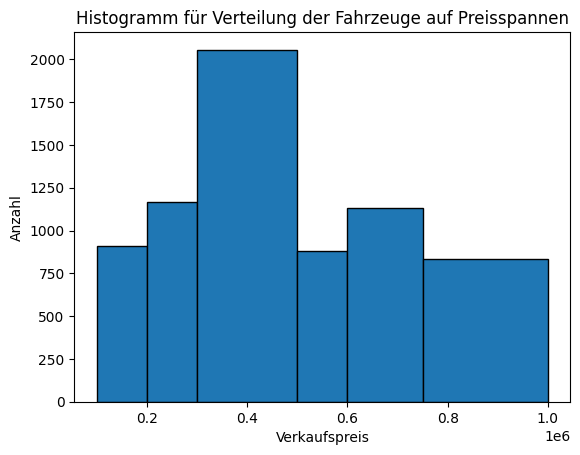

In [3]:
# einfaches Histogram für verschiedene Preisspannen
plot.hist(
    df_cars['selling_price'], 
    bins=[100000, 200000, 300000, 500000, 600000, 750000, 1000000], 
    edgecolor='black')

plot.xlabel("Verkaufspreis") 
plot.ylabel("Anzahl")
plot.title("Histogramm für Verteilung der Fahrzeuge auf Preisspannen")

# Plot anzeigen
plot.show()


Wir sehen eine nennenswert hohe Verteilung auf die von uns gewählte Preispannen.
Von über 8000 Einträgen im Datensatz ist eine hohe Verteilung auf die Preispanne 300000 - 500000 ablesbar.

### 2. Pivot Tabelle
Zuvor haben wir bereits geschaut, welche Hersteller in unserem Datensatz existieren. Wir kennen jetzt auch grob die Verteilung der Preispannen aller Fahrzeuge in unserem Datensatz. Wir interessieren uns im folgenden aber nur für bestimmte Fahrzeuge. Deutsche, japanische und amerikanische Hersteller bauen tolle Autos und wir möchten uns einige Fahrzeuge dieser Hersteller genauer ansehen. In einer Pivot-Tabelle wollen wir uns bevorzugte Fahrzeuge anschauen und den durchschnittlichen Preis der Hersteller ansehen. Diesmal soll auch unterschieden werden, um welche Kraftstoffart es sich bei dem durchschnittlichen Preis des Herstellers handelt. Als zusätliche Variable schauen wir uns an, wie die durchschnittliche Kilometerangabe für den Hersteller und die jeweilige Kraftstoffart aussehen. 
Folgende Fahrzeughersteller schauen wir uns an:

+ BWM
+ Toyota
+ Lexus
+ Ford
+ Chevrolet
+ Audi
+ Mercedes-Benz
+ Honda

In [4]:
# Neue Spalte mit Herstellernamen
df_cars['manufacturer'] = df_cars['name'].str.split().str[0]

# Filtern nach bevorzugten Herstellern
pref_filter = ['BMW', 'Toyota', 'Lexus', 'Ford', 'Chevrolet', 'Audi', 'Mercedes-Benz', 'Honda']
filtered_manufacturers = df_cars[df_cars['manufacturer'].isin(pref_filter)]

# Pivot Tabelle erstellen und aufsteigend nach Herstellernamen sortieren
pvt = pandas.pivot_table(
    filtered_manufacturers,
    values=['selling_price', 'km_driven'], 
    index=['manufacturer', 'fuel'],
    aggfunc='mean').sort_values('manufacturer')

# Print Pivot Tabelle mit 2 Nachkommastellen
print(pvt.to_string(float_format="{:.2f}".format))

                      km_driven  selling_price
manufacturer  fuel                            
Audi          Diesel   58570.34     2382828.51
              Petrol   21180.00     4217799.80
BMW           Diesel   29915.68     4164230.77
              Petrol   44066.67     1991666.67
Chevrolet     Diesel   92678.60      349341.05
              LPG      77000.00      200000.00
              Petrol   63041.38      177015.39
Ford          Diesel   82719.41      534307.12
              Petrol   45246.33      467028.83
Honda         Diesel   73188.71      673374.05
              Petrol   54422.85      563463.84
Lexus         Petrol   20000.00     5150000.00
Mercedes-Benz Diesel   55144.53     2607850.00
              Petrol   43642.86     2077857.14
Toyota        Diesel  119531.82      948760.28
              Petrol   53064.50      992431.98


### 3. Korrelation (Lineare Regression)
Wir interessieren uns für den Kauf eines Fahrzeugs. Gerne wollen wir aber herausfinden, ob die Preisgestaltung der Fahrzeuge eine Korrelation mit den gefahrenen Kilometern aufweist.

#### Streudiagram mit Regressionsgerade
Wir schauen im Streudiagramm mit Regressionsgerade die Stelle an, an dem die Fahrzeuge aus unserem Filter einen Kilometerstand von 0 - 200.000km aufweisen und möchten mit dem linearen Regressionsmodell aus sklearn die Berechnung des Koeffizienten ausgeben sowie den Preistrend nach gefahrenen Kilomentern vorhersagen. Hierfür importieren wir noch metrics aus sklearn, um die mittlere  quadratische Abweichung sowie das Bestimmtheitsmaß bei unserer Preisvorhersage zu erfassen.

y = 1663054.319355 + -8.335936 * x
mittlere quadratische Abweichung: 1519081570240.11
Bestimmtheitsmaß: 0.12


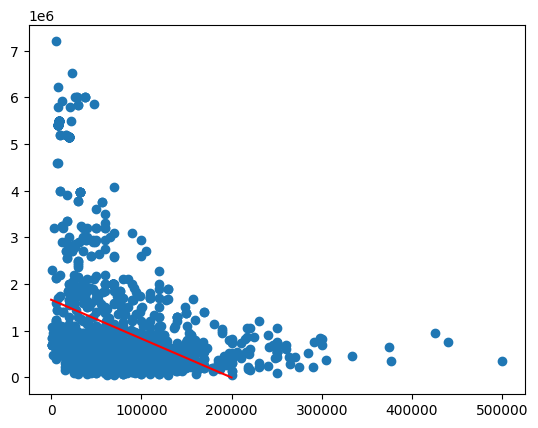

In [5]:
from sklearn import linear_model, metrics
model = linear_model.LinearRegression()

x = filtered_manufacturers[['km_driven']]
y = filtered_manufacturers[['selling_price']]
model.fit(x.values, y)

a = model.intercept_
b = model.coef_[0]
print('y = %f + %f * x'%(a,b)) 

xfit = [[0],[200000]]
yfit = model.predict(xfit)

plot.scatter(x, y)
plot.plot(xfit, yfit, color= 'red');


y_predicted = model.predict(x.values)
print("mittlere quadratische Abweichung: %.2f" % metrics.mean_squared_error(y, y_predicted))
print("Bestimmtheitsmaß: %.2f" % metrics.r2_score(y, y_predicted))

Wir sehen eine Abnahme des Preises bei steigender Kilometeranzahl der Fahrzeuge aus unserem Filter. Unser Modell zeigt dabei einen mittleren linearen Zusammenhang bei einem Bestimmtheitsmaß von 0,12 (mittel). Die Hohe mittlere quadratische Abweichung deutet aber auf eine niedrige Qualität unserer Prognosemodells. Das kann unter anderem an großen Ausreißern bei den Preisen allgemein liegen. 

### 4. Multiple Regression
Als Erweiterung unseres Modells führen wir eine mehfrachlineare Regression durch und beachten eine zusätzliche Variable. Wir möchten bei den Fahrzeugen nun auch zwischen der Kraftstoffart unterscheiden und schauen, wie sich das auf die Preisgestaltung auswirkt. Da wir bei eine Spalte mit kategorischen Daten (CNG, Diesel, LPG, Petrol) für die Kraftstoffart haben, müssen diese per One-Hot-Encoding in Ziffern verwandelt werden. CNG taucht in unserem gefilterten Datensatz nicht auf, deshalb ignorieren wir es im nachvollgenden Code.

In [6]:
# One-hot encoding der fuel Spalte und Zuweisung auf einen Dummy df.
fuel_dummies = pandas.get_dummies(filtered_manufacturers['fuel'], prefix='fuel')

# Zusammenführen des ursprung bzw. geilterten Dataframes mit unserem neuen Dummy 
merged_df = pandas.concat([filtered_manufacturers, fuel_dummies], axis=1)


x = merged_df[['km_driven', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']]
y = merged_df[['selling_price']]
model.fit(x, y)

y_predicted = model.predict(x)
print("mittlere quadratische Abweichung: %.2f" % metrics.mean_squared_error(y, y_predicted))
print("Bestimmtheitsmaß: %.2f" % metrics.r2_score(y, y_predicted))

mittlere quadratische Abweichung: 1416438841038.33
Bestimmtheitsmaß: 0.18


Wir haben ein verbessertes Modell und konnten eine etwas niedrigere mittlere quadratische Abweichung erreichen. Das Bestimmtheitsmaß ist bei 0,18 und damit höher als bei der einfachen Regression, was für eine bessere Qualität unseres Modells spricht.